# [Digital Mammography DREAM Challenge]()
## Preprocessing for Dream Challenge data

This notebook will contain the code for preprocessing the .dcm file data from the 2016 Digital Mammography DREAM Challenge.

The code will contain several steps, and each step will be distinguished by a markdown specifying its role.

## Step 0. Defining directory paths for preprocessing & importation

Below will be the variables containing the directories of the certain paths that are provided from the Dream Challnege task.

In [20]:
path_training     = './trainingData/'
path_preprocessed = './preprocessedData/'

Below will be the variables containing the directories of the certain paths that will be needed during the preprocessing stage.

- train_ben : path that will be containing the 'benign' examples of the 'training' data.
- train_mal : path that will be containing the 'malignant' examples of the 'training' data.
- valid_ben : path that will be containing the 'benign' examples of the 'validation' data.
- valid_mal : path that will be containing the 'malignant' examples of the 'validation' data.

In [21]:
train_ben = './preprocessedData/train/benign'
train_mal = './preprocessedData/train/malignant'
valid_ben = './preprocessedData/val/benign'
valid_mal = './preprocessedData/val/malignant'

Below will be the basic importation requirements for the rest of the code.

In [22]:
import os
import os.path
import glob
import numpy as np
import pandas as pd
import cv2
import dicom
import math
import sys

## Step 1. Extracting Pixel informations from the given .dcm(dicom) format files

Below will be the code for extracting pixel informations from a certain .dcm file.

This will be an example code, thus we will use only a few examples to verify it activates correctly.

The processing for the entire code will be contained at the last part of this notebook.

In [27]:
for dirName, subdirList, fileList in os.walk(path_training):
    for filename in fileList:
        if ".dcm" == os.path.splitext(filename)[1]: # check whether the file is dicom
            ds = dicom.read_file(path_training+filename)
            arr = ds.pixel_array
            image = cv2.convertScaleAbs(arr, alpha=(255.0/arr.max(axis=1).max(axis=0)))
            
            # getting threshold and trimming breast part
            ret,thresh = cv2.threshold(image,0,255,0)
            contours,_ = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
            areas = [cv2.contourArea(c) for c in contours]
            max_index = np.argmax(areas)
            
            # Get largest contour - extract breast
            cnt=contours[max_index]
            mask = np.zeros(image.shape,np.uint8)
            cv2.drawContours(mask,[cnt],0,255,-1)
            
            # 1st final image with breast ROI extracted
            image = cv2.bitwise_and(image, image, mask=mask)
            
            print("Extracting pixels from "+filename+"...")
            break
            
print image.shape

Extracting pixels from 221304.dcm...
(4096, 3328)


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

def imshow_gray(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'), cmap = 'gray')
    plt.gca().axis('off')

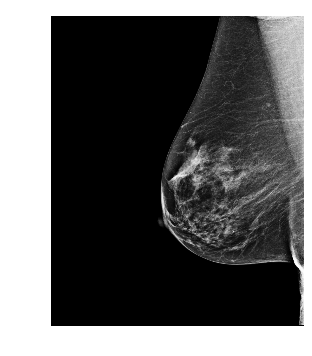

In [30]:
imshow_gray(image)